In [14]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [4]:
# Separate the data into labels and features
features = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt']

# Separate the y variable, the labels
y = df.loan_status

# Separate the X variable, the features
X = df.loc[:,features]

In [6]:
# Review the y variable Series
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64


In [8]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [9]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [10]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
lr = LogisticRegression()
# Assign a random_state parameter of 1 to the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
# Fit the model using training data
lr.fit(X_train, y_train)

LogisticRegression()

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [11]:
# Make a prediction using the testing data
test_preds = lr.predict(X_test)
test_proba = lr.predict_proba(X_test)[:, 1]

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

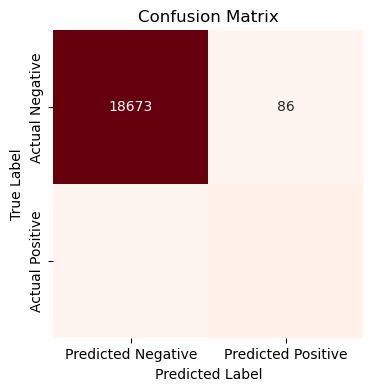

In [16]:
# Generate a confusion matrix for the model
test_cf = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(4, 4))
sns.heatmap(test_cf, annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [17]:
# Print the classification report for the model
test_cr = classification_report(y_test, test_preds)

print(f"""Classification Report:
    {test_cr}""")

Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.95      0.91       625

    accuracy                           0.99     19384
   macro avg       0.94      0.97      0.95     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The model performs excellently for class 0 (healthy loans) with perfect precision and recall.
For class 1 (high-risk loans), while the precision is lower, the recall is high, indicating that the model is good at identifying most high-risk loans, but there are some false positives.
Overall, the model shows strong performance with an accuracy of 99%, making it quite reliable for this classification task.

---